In [31]:
import os
import numpy as np
import netCDF4
import matplotlib.pyplot as plt
from matplotlib import rcParams
import calendar
%matplotlib inline
rcParams.update({'font.size': 22})

In [33]:
yearmin, yearmax = 2015, 2015
N = 3     # N most frequent values will be plotted
figdir = '/home/ctroupin/Projects/1-Internal/20141201_QC/figures'
cmap = plt.cm.copper

(0.0, 0.0, 0.0, 1.0)
(0.10173007986973899, 0.064334117647058819, 0.04097058823529412, 1.0)
(0.20346015973947798, 0.12866823529411764, 0.081941176470588239, 1.0)
(0.31003452912682361, 0.19606588235294117, 0.12486274509803921, 1.0)
(0.41176460899656259, 0.26039999999999996, 0.16583333333333333, 1.0)
(0.51349468886630156, 0.32473411764705878, 0.20680392156862742, 1.0)
(0.62006905825364722, 0.39213176470588235, 0.24972549019607843, 1.0)
(0.72179913812338625, 0.45646588235294122, 0.29069607843137257, 1.0)
File http://thredds.socib.es/thredds/dodsC/mooring/weather_station/mobims_calamillor-scb_met001/L1/2015/dep0001_mobims-calamillor_scb-met001_L1_2015-08.nc doesn't exist
(0.82352921799312517, 0.52079999999999993, 0.33166666666666667, 1.0)
(0.93010358738047083, 0.58819764705882349, 0.37458823529411767, 1.0)
(1.0, 0.65253176470588237, 0.41555882352941176, 1.0)
(1.0, 0.71686588235294113, 0.45652941176470585, 1.0)
dep0001_mobims-calamillor_scb-met001_L1_2015-


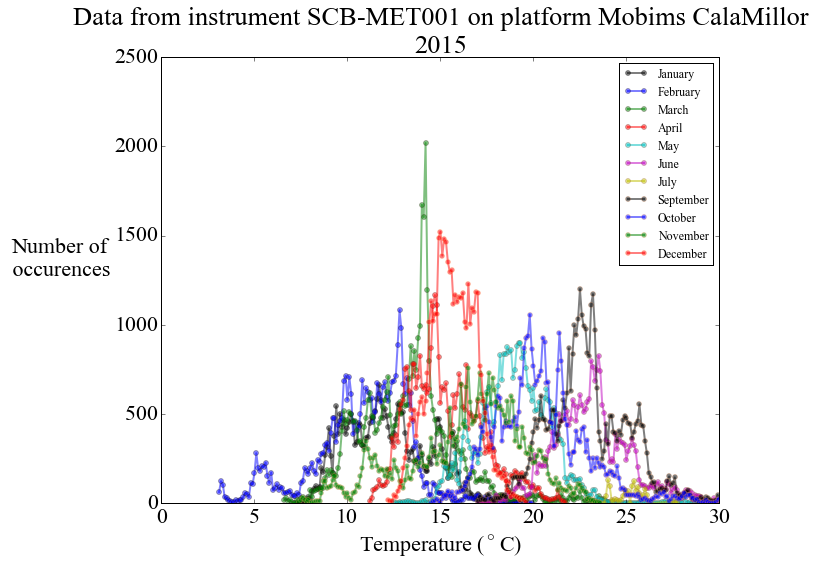

In [42]:
for years in range(yearmin, yearmax + 1):
    
    # Make the plot
    fig = plt.figure(figsize=(10, 8))

        
    for months in range(1, 13):
        print(cmap((months - 1) / 12.))
        yyyy = str(years)
        mm = str(months).zfill(2)
        #datafile = ("http://thredds.socib.es/thredds/dodsC/mooring/"
        #            "weather_station/station_parcbit-scb_met004/L1/{0}/"
        #            "dep0002_station-parcbit_scb-met004_L1_{1}-{2}.nc".format(yyyy, yyyy, mm))
        
        datafile = ("http://thredds.socib.es/thredds/dodsC/mooring/"
                    "weather_station/mobims_calamillor-scb_met001/L1/{0}/"
                    "dep0001_mobims-calamillor_scb-met001_L1_{1}-{2}.nc".format(yyyy, yyyy, mm))
        
        try:
            # Load temperature form netCDF
            with netCDF4.Dataset(datafile) as nc:
                temperature = nc.variables['AIRT'][:]
                #temperature = nc.variables['AIR_TEM'][:]
                #temperatureQC = nc.variables['QC_AIR_TEM'][:]
                filetitle = nc.title

            # Count each occurence of the temperature values
            unique_temperature, counts = np.unique(temperature, return_counts=True)

            # Get the N most frequent values
            index_max = np.argsort(counts)[-N:]


            plt.plot(unique_temperature, counts, 'o-', ms=5, alpha=0.5,
                     markeredgecolor=cmap((months - 1) / 12.), label=calendar.month_name[months])
            # plt.plot(unique_temperature[index_max], counts[index_max], 'ro')

        except RuntimeError:
            print("File {0} doesn't exist".format(datafile))
        
    figname = datafile.split('/')[-1][:-5]
    print(figname)
    hl = plt.legend(fontsize=12)
    plt.xlabel('Temperature ($^{\circ}$C)')
    plt.ylabel('Number of\n occurences', rotation=0, ha='right')
    plt.title(filetitle + '\n' + yyyy)
    plt.xlim(0., 30.)
    plt.show()
    #plt.savefig(os.path.join(figdir, figname), dpi=300)
    #plt.close()